# FLOODS PREDICTION


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

# LOADING THE DATASET

In [2]:
data=pd.read_csv("./DataSets/Historic_Flood.xlsx.csv")
data

,DATE,AREA,CODE,WARNING / ALERT AREA NAME,TYPE
0,31/01/2006,SW - Devon,113WACT2a,Devon Coast (North),Flood Watch
1,31/01/2006,SW - North Wessex,112WACTAVN,Porlock to Avonmouth,Flood Watch
2,08/02/2006,ANG - Eastern,054WATBT1,"Tidal Rivers Bure, Ant and Thurne",Flood Watch
3,08/02/2006,ANG - Eastern,054WATBT2,Tidal River Yare,Flood Watch
4,08/02/2006,ANG - Eastern,054WATBT3,Tidal River Waveney,Flood Watch
...,...,...,...,...,...
58774,31/03/2021,Gtr Mancs Mersey and Ches,013WATMEW,Mersey Estuary at Warrington,Update Flood Alert
58775,31/03/2021,"East Anglia - Essex, Norfolk and Suffolk",051WACDV4C,"The Essex coast from Clacton to and including,...",Flood Alert
58776,31/03/2021,Wessex - North,112WATSOM1,Somerset coast at Porlock Weir,Update Flood Alert
58777,31/03/2021,Kent S London and E Sussex,063WAT23West,Tidal Thames riverside from Putney Bridge to T...,Update Flood Alert


In [3]:
data.describe()

,DATE,AREA,CODE,WARNING / ALERT AREA NAME,TYPE
count,58779,58779,58779,58779,58779
unique,3006,49,4083,4516,7
top,09/02/2020,NE - Yorkshire North and East,122WAC954,North Sea Coast at Bridlington,Flood Alert
freq,478,3566,645,658,29090


In [4]:
data.info

<bound method DataFrame.info of              DATE                                      AREA             CODE  \
0      31/01/2006                                SW - Devon        113WACT2a   
1      31/01/2006                         SW - North Wessex       112WACTAVN   
2      08/02/2006                             ANG - Eastern        054WATBT1   
3      08/02/2006                             ANG - Eastern        054WATBT2   
4      08/02/2006                             ANG - Eastern        054WATBT3   
...           ...                                       ...              ...   
58774  31/03/2021                 Gtr Mancs Mersey and Ches        013WATMEW   
58775  31/03/2021  East Anglia - Essex, Norfolk and Suffolk       051WACDV4C   
58776  31/03/2021                            Wessex - North       112WATSOM1   
58777  31/03/2021                Kent S London and E Sussex     063WAT23West   
58778  31/03/2021                Kent S London and E Sussex  063WAT23Central   

       

In [5]:
data.var()

Series([], dtype: float64)

In [6]:
data.shape

(58779, 5)

In [7]:
data.dtypes

DATE                         object
AREA                         object
CODE                         object
WARNING / ALERT AREA NAME    object
TYPE                         object
dtype: object

**Checking Null Values**

In [8]:
data.isnull().sum()

DATE                         0
AREA                         0
CODE                         0
WARNING / ALERT AREA NAME    0
TYPE                         0
dtype: int64

In [9]:
data.columns

Index(['DATE', 'AREA', 'CODE', 'WARNING / ALERT AREA NAME', 'TYPE'], dtype='object')

In [10]:
data.isnull().any()

DATE                         False
AREA                         False
CODE                         False
WARNING / ALERT AREA NAME    False
TYPE                         False
dtype: bool

In [11]:
data.value_counts()

DATE        AREA               CODE              WARNING / ALERT AREA NAME                                                                    TYPE         
03/03/2007  MID - East         034WAF402         River Soar in Leicestershire                                                                 Flood Watch      8
25/06/2007  MID - East         034WAF409         Lower Derwent in Derbyshire                                                                  Flood Watch      7
16/01/2008  MID - East         034WAF402         River Soar in Leicestershire                                                                 Flood Watch      4
08/12/2007  SW - North Wessex  112FWF3C1C        River Isle from Chard Reservoir to Hambridge                                                 Flood Warning    4
03/12/2006  SW - South Wessex  111WATTWBYH1      West Bay                                                                                     Flood Watch      4
                                       

In [12]:
#lets find the categorialfeatures
list_1=list(data.columns)


In [13]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [15]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])


In [16]:
data

,DATE,AREA,CODE,WARNING / ALERT AREA NAME,TYPE
0,2950,34,3017,384,2
1,2950,35,2850,1351,2
2,696,1,1568,4139,2
3,696,1,1569,4137,2
4,696,1,1570,4134,2
...,...,...,...,...,...
58774,2973,10,442,1036,4
58775,2973,8,1172,3881,0
58776,2973,43,2875,3743,4
58777,2973,12,2039,4154,4


# Exploratory Data Analysis

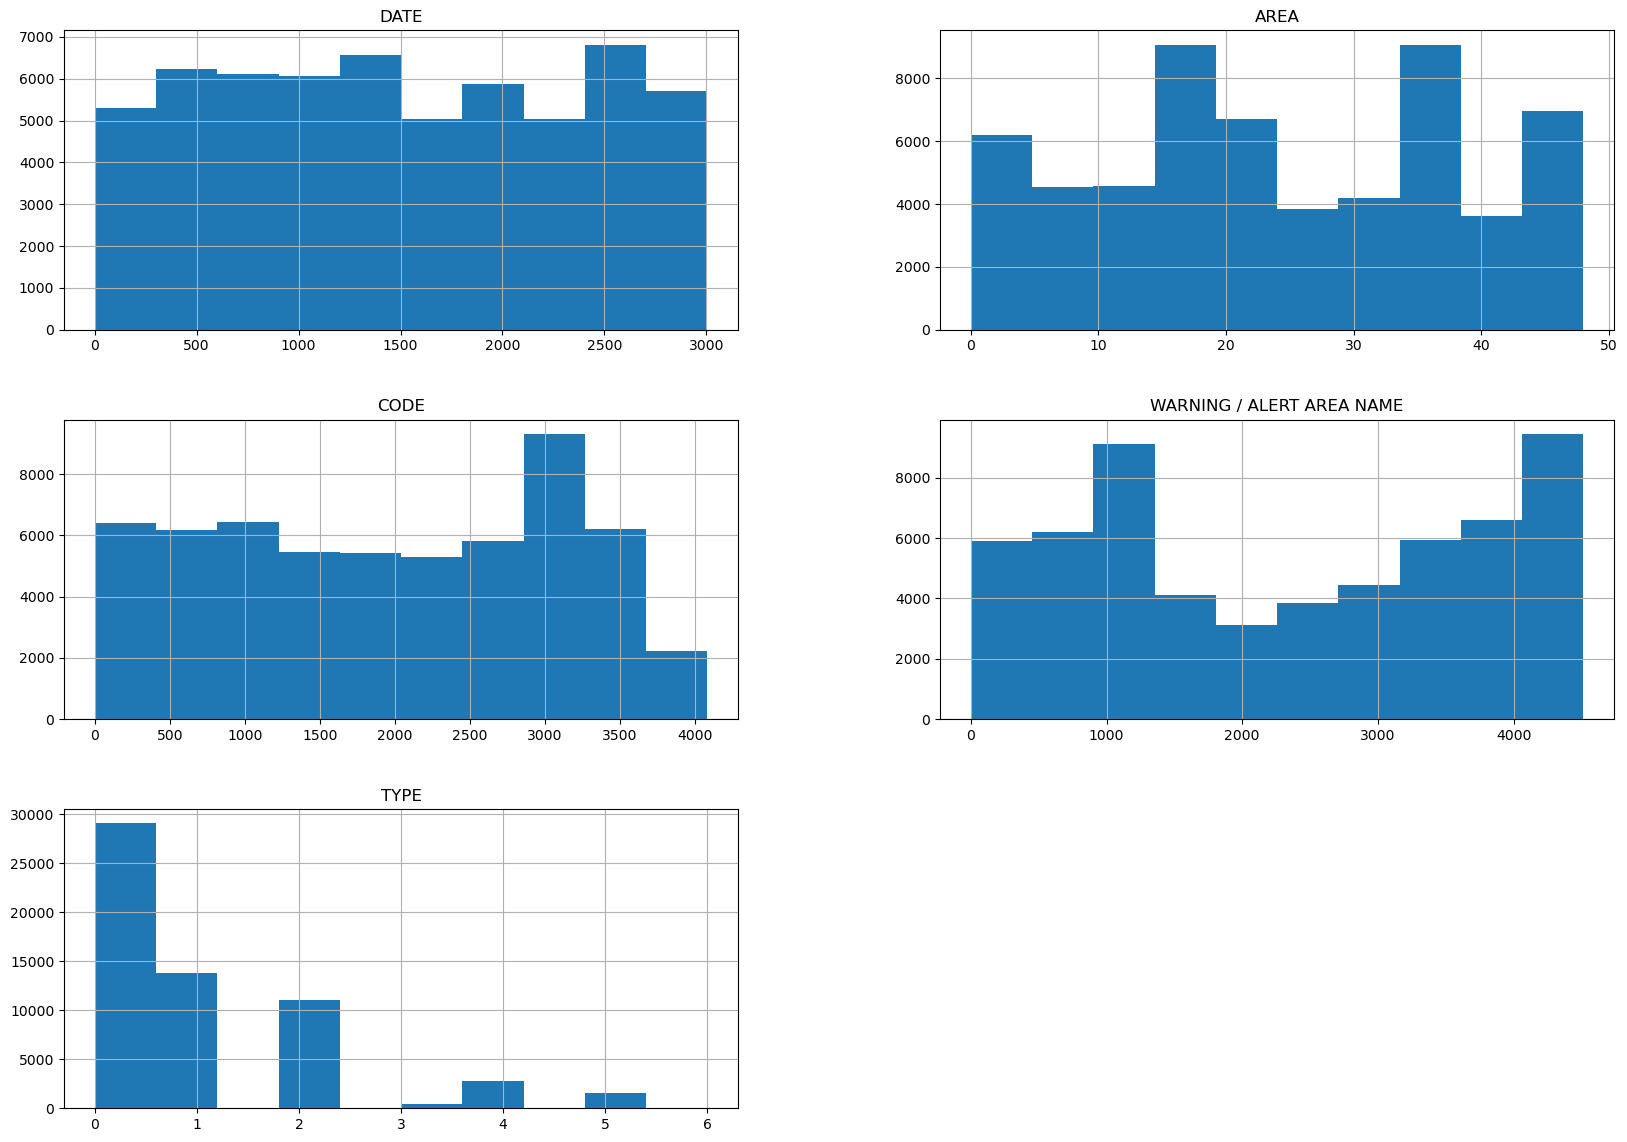

In [17]:
data.hist(figsize=(20,14))
plt.show()


<AxesSubplot:>

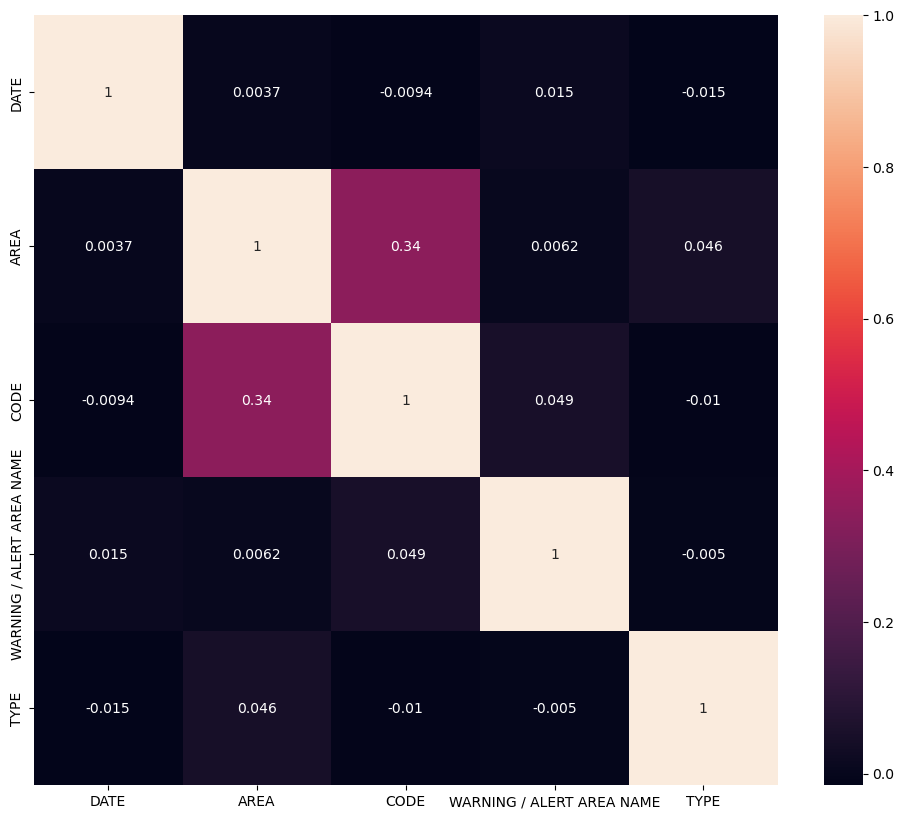

In [18]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)


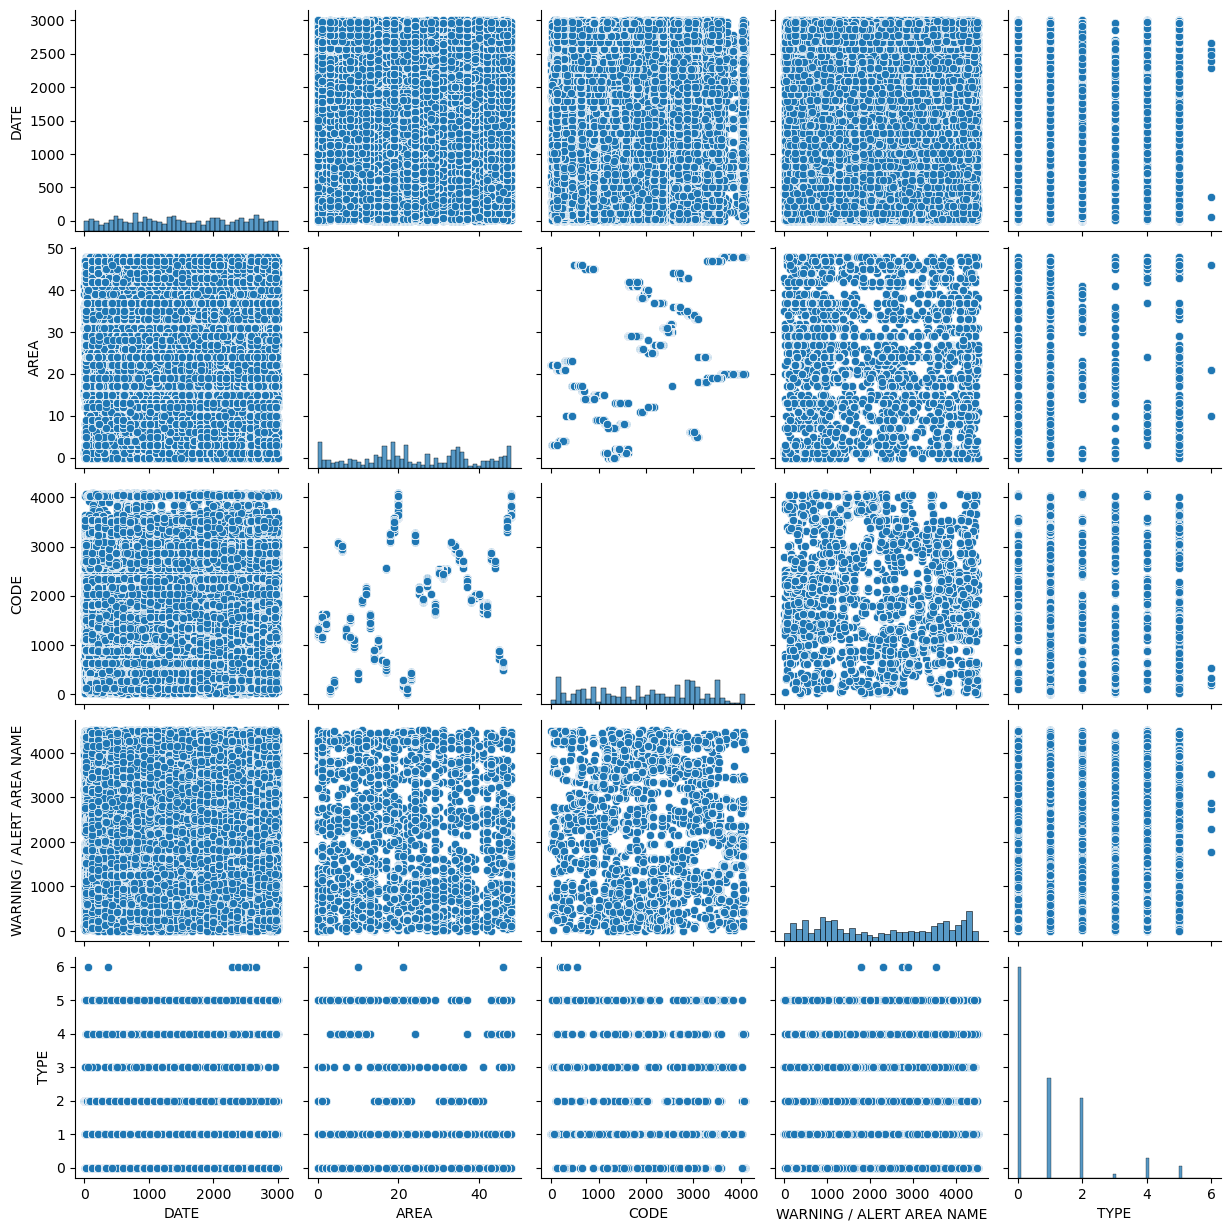

In [19]:
sns.pairplot(data=data)


<AxesSubplot:xlabel='WARNING / ALERT AREA NAME'>

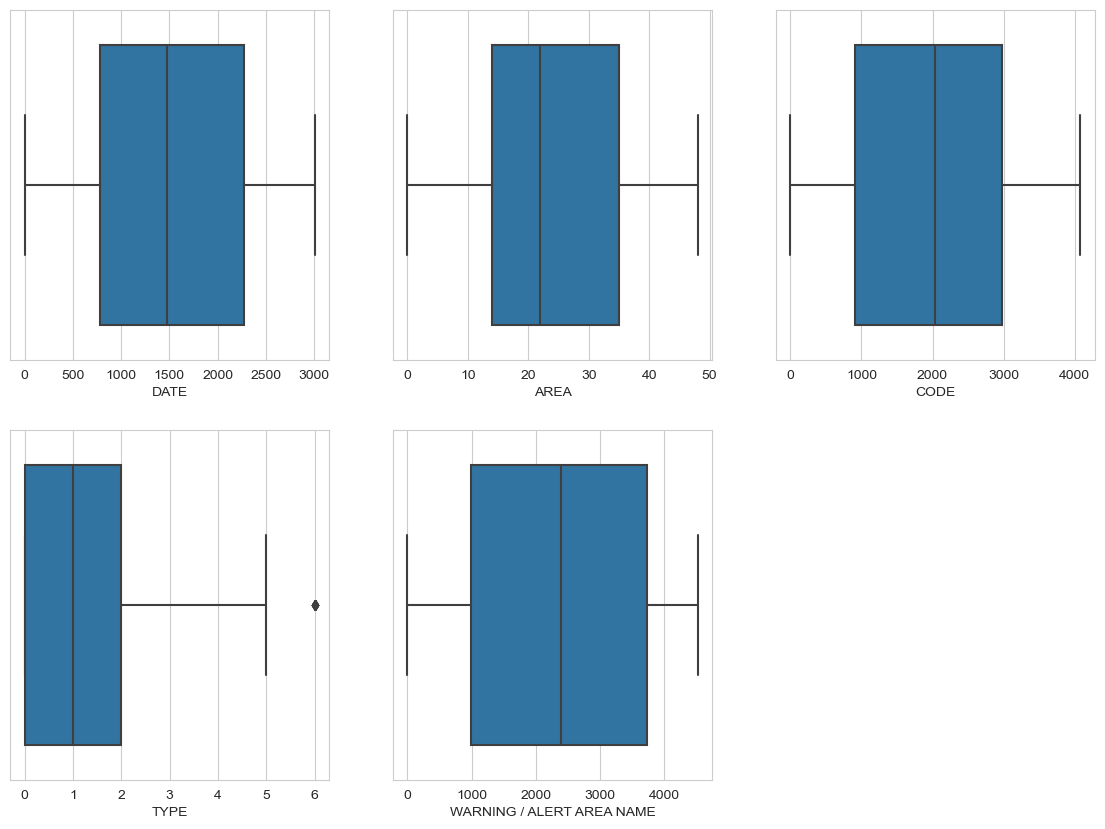

In [20]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='DATE',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='AREA',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='CODE',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='TYPE',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='WARNING / ALERT AREA NAME',data=data)


<AxesSubplot:xlabel='AREA', ylabel='TYPE'>

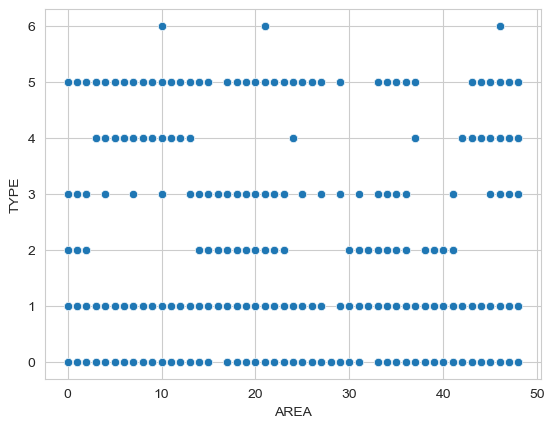

In [21]:
sns.scatterplot(x='AREA', y= 'TYPE', data=data)


<AxesSubplot:xlabel='CODE', ylabel='AREA'>

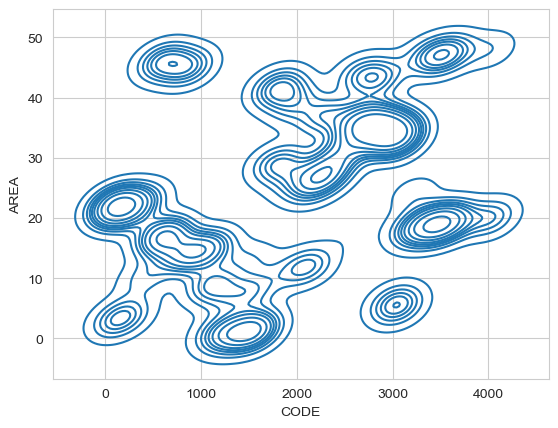

In [22]:
sns.kdeplot(x='CODE',y= 'AREA', data=data)

<AxesSubplot:xlabel='CODE', ylabel='AREA'>

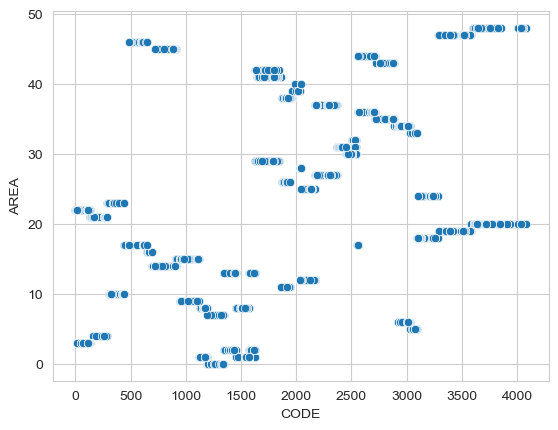

In [23]:
sns.scatterplot(x='CODE', y= 'AREA', data=data)

<AxesSubplot:xlabel='WARNING / ALERT AREA NAME'>

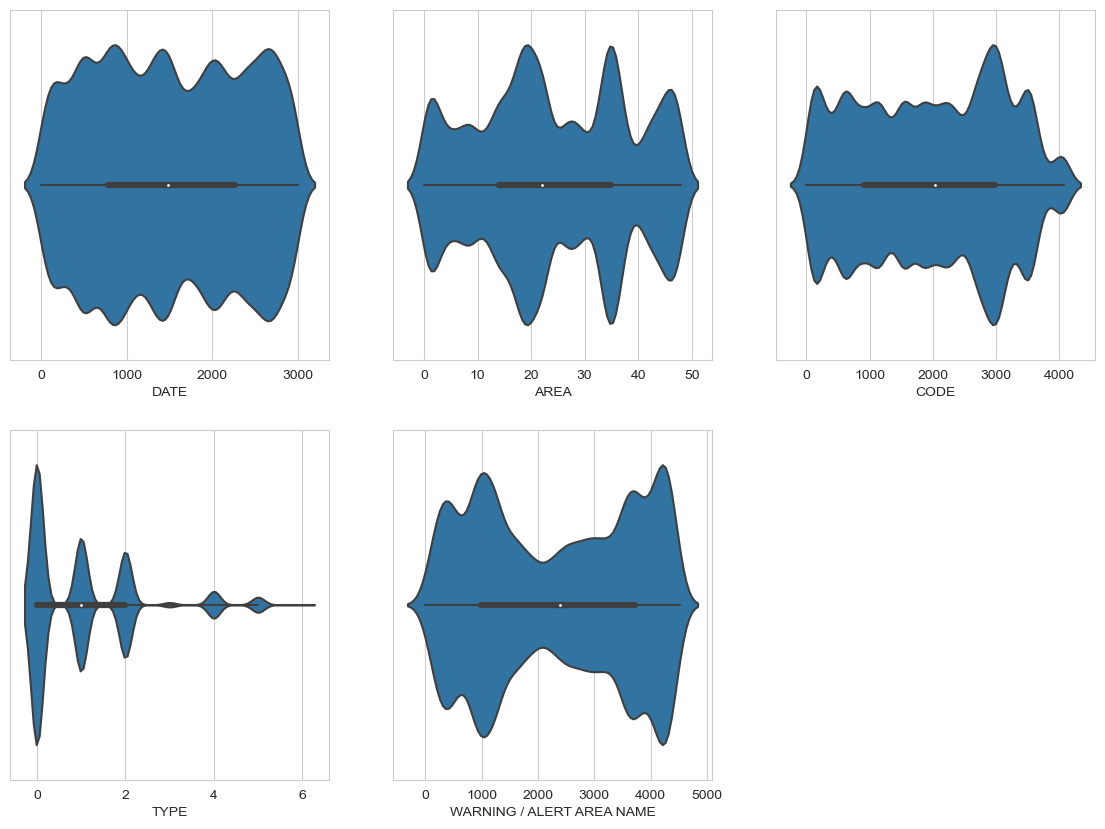

In [24]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.violinplot(x='DATE',data=data)
plt.subplot(2,3,2)
sns.violinplot(x='AREA',data=data)
plt.subplot(2,3,3)
sns.violinplot(x='CODE',data=data)
plt.subplot(2,3,4)
sns.violinplot(x='TYPE',data=data)
plt.subplot(2,3,5)
sns.violinplot(x='WARNING / ALERT AREA NAME',data=data)

<AxesSubplot:xlabel='CODE', ylabel='AREA'>

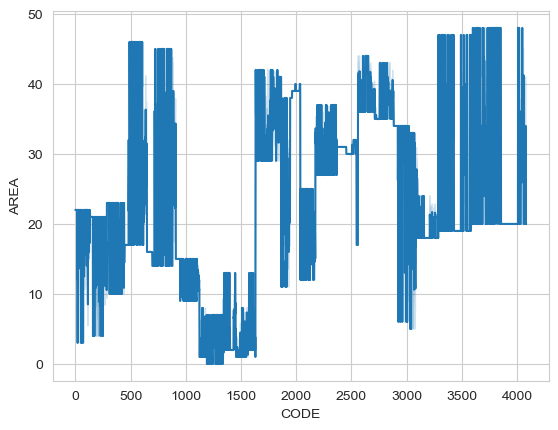

In [25]:
sns.lineplot(x='CODE', y= 'AREA', data=data)

<AxesSubplot:xlabel='WARNING / ALERT AREA NAME', ylabel='Density'>

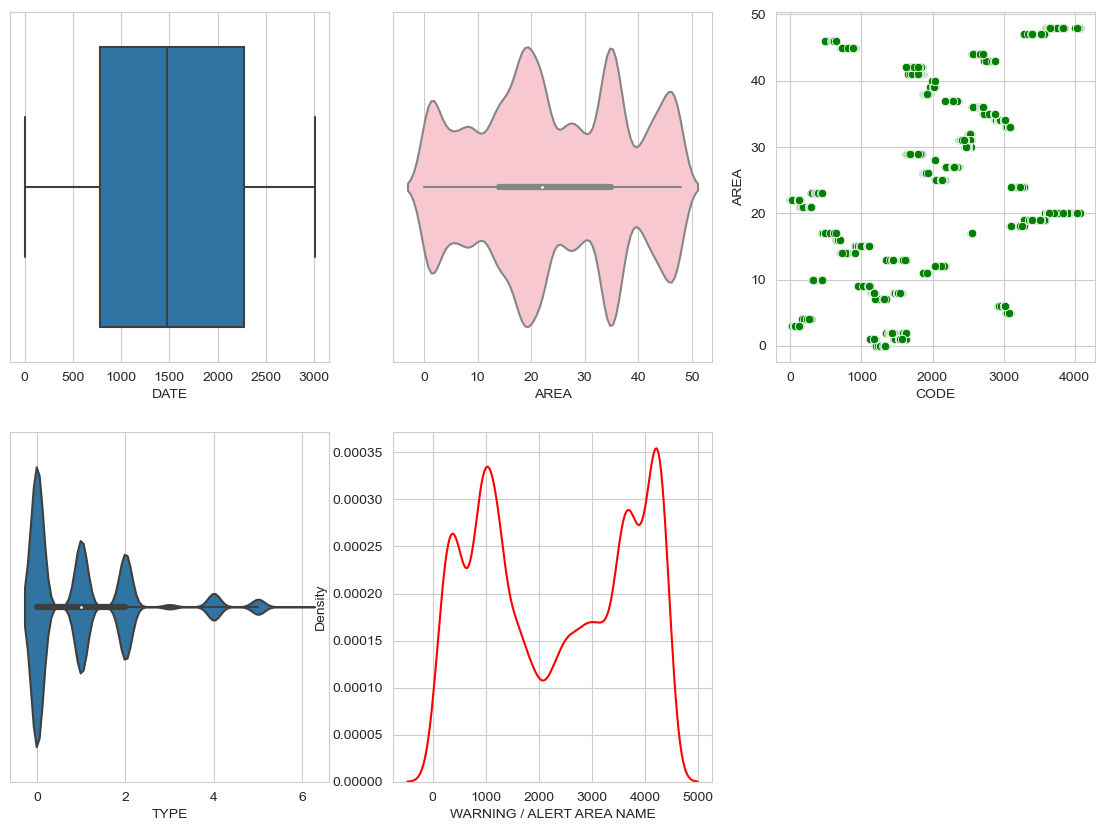

In [26]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='DATE',data=data)
plt.subplot(2,3,2)
sns.violinplot(x='AREA',data=data,color='pink')
plt.subplot(2,3,3)
sns.scatterplot(x='CODE',y='AREA',data=data,color='g')
plt.subplot(2,3,4)
sns.violinplot(x='TYPE',data=data)
plt.subplot(2,3,5)
sns.kdeplot(x='WARNING / ALERT AREA NAME',data=data,color='r')

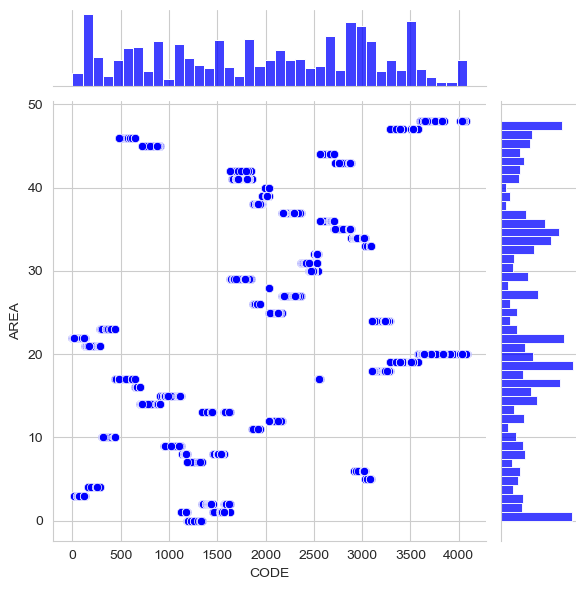

In [27]:
sns.jointplot(x='CODE',y='AREA',data=data,color='blue')

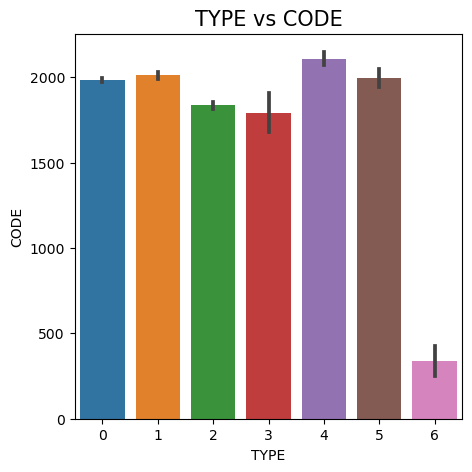

In [28]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="TYPE", y="CODE", data=data)
plt.title("TYPE vs CODE",fontsize=15)
plt.xlabel("TYPE")
plt.ylabel("CODE")
plt.show()


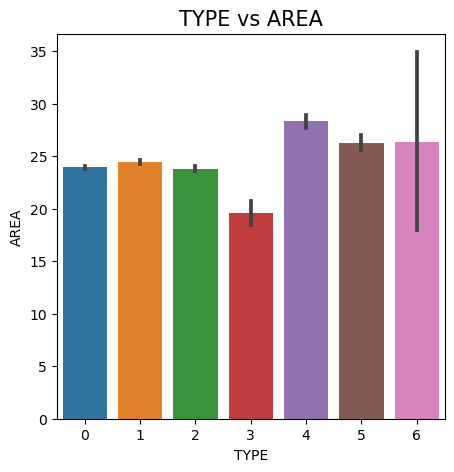

In [29]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="TYPE", y="AREA", data=data)
plt.title("TYPE vs AREA",fontsize=15)
plt.xlabel("TYPE")
plt.ylabel("AREA")
plt.show()


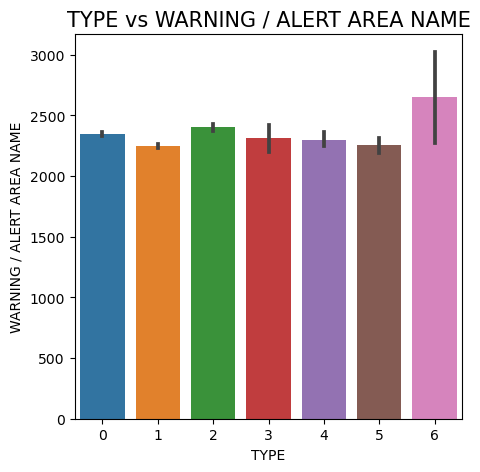

In [30]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="TYPE", y="WARNING / ALERT AREA NAME", data=data)
plt.title("TYPE vs WARNING / ALERT AREA NAME",fontsize=15)
plt.xlabel("TYPE")
plt.ylabel("WARNING / ALERT AREA NAME")
plt.show()

In [31]:
data.columns

Index(['DATE', 'AREA', 'CODE', 'WARNING / ALERT AREA NAME', 'TYPE'], dtype='object')

In [32]:
y=data['AREA']
x=data.drop('AREA',axis=1)


# TRAINING AND TESTING DATA

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


In [34]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


47023
11756
47023
11756


# MODELS
**1. KNeighborsClassifier**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [36]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
accuracy_score(y_test,y_pred)*100


Classification Report is:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       160
           1       0.79      0.82      0.81       548
           2       0.54      0.63      0.58       174
           3       0.57      0.46      0.51       212
           4       0.54      0.43      0.48       133
           5       0.48      0.54      0.51       151
           6       0.42      0.29      0.34       167
           7       0.64      0.58      0.61       111
           8       0.77      0.86      0.81       228
           9       0.60      0.47      0.53       227
          10       0.57      0.50      0.53       133
          11       0.41      0.44      0.42        68
          12       0.54      0.51      0.53       254
          13       0.49      0.27      0.34       135
          14       0.63      0.63      0.63       379
          15       0.58      0.70      0.63       276
          16       0.66      0.49      0.57        79


65.2347737325621

**2. Naive Bayes**

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [38]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.36      0.49       160
           1       0.42      0.39      0.41       548
           2       0.26      0.18      0.22       174
           3       0.46      0.08      0.14       212
           4       0.60      0.30      0.40       133
           5       0.69      0.22      0.33       151
           6       0.55      0.04      0.07       167
           7       0.64      0.56      0.60       111
           8       0.36      0.83      0.50       228
           9       0.55      0.53      0.54       227
          10       0.68      0.27      0.39       133
          11       0.50      0.07      0.13        68
          12       0.70      0.18      0.29       254
          13       0.00      0.00      0.00       135
          14       0.57      0.73      0.64       379
          15       0.42      0.52      0.47       276
          16       0.97      0.80      0.88        79


In [39]:
accuracy_score(y_test,y_pred)*100

60.148009527050014

**3. DECISION TREE CLASSIFIER**

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [41]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74       160
           1       0.61      1.00      0.76       548
           2       0.54      0.59      0.57       174
           3       0.86      0.15      0.25       212
           4       1.00      0.18      0.31       133
           5       0.89      0.22      0.35       151
           6       0.66      0.11      0.19       167
           7       0.00      0.00      0.00       111
           8       0.00      0.00      0.00       228
           9       0.58      1.00      0.74       227
          10       0.88      0.26      0.40       133
          11       0.86      0.09      0.16        68
          12       0.00      0.00      0.00       254
          13       0.00      0.00      0.00       135
          14       0.70      0.34      0.46       379
          15       1.00      0.41      0.58       276
          16       1.00      1.00      1.00        79


In [42]:
accuracy_score(y_test,y_pred)*100

68.62027900646478

In [43]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
28490,27,37
41369,47,19
51309,44,36
10300,34,34
26631,27,27
...,...,...
16034,0,0
52933,46,17
14758,35,35
21421,17,17


**4.Random Forest Classifier**

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [45]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       160
           1       0.99      0.99      0.99       548
           2       0.72      0.79      0.76       174
           3       0.70      0.70      0.70       212
           4       0.81      0.72      0.76       133
           5       0.62      0.59      0.61       151
           6       0.58      0.56      0.57       167
           7       0.86      0.86      0.86       111
           8       0.98      1.00      0.99       228
           9       0.69      0.68      0.68       227
          10       0.73      0.73      0.73       133
          11       0.60      0.59      0.59        68
          12       0.76      0.70      0.73       254
          13       0.69      0.59      0.63       135
          14       0.76      0.78      0.77       379
          15       0.74      0.74      0.74       276
          16       1.00      1.00      1.00        79


In [46]:
accuracy_score(y_test,y_pred)*100

80.09527050017013

In [47]:
data.columns

Index(['Actual', 'Predicted'], dtype='object')

**5. ExtraTreesClassifier**

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)


ExtraTreesClassifier(random_state=0)

In [49]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       160
           1       0.99      0.99      0.99       548
           2       0.71      0.77      0.74       174
           3       0.61      0.64      0.63       212
           4       0.80      0.71      0.75       133
           5       0.58      0.55      0.57       151
           6       0.53      0.56      0.54       167
           7       0.84      0.85      0.84       111
           8       0.97      0.99      0.98       228
           9       0.67      0.64      0.66       227
          10       0.72      0.69      0.70       133
          11       0.57      0.56      0.56        68
          12       0.76      0.70      0.73       254
          13       0.67      0.59      0.63       135
          14       0.71      0.72      0.72       379
          15       0.72      0.75      0.73       276
          16       1.00      1.00      1.00        79


In [50]:
accuracy_score(y_test,y_pred)

0.7808778496087104

**6.Bagging Classifier**

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.8767437904048996

In [52]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
28490,27,27
41369,47,19
51309,44,44
10300,34,34
26631,27,27
...,...,...
16034,0,0
52933,46,46
14758,35,43
21421,17,17


# CONCLUSION :

Best model is: agging Classifier with about 88% accuracy.